In [18]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
import requests
import json

In [19]:
# Load Data
source = "Resources/final_housing.csv"
df_data = pd.read_csv(source)
df_data.tail()
df_data = df_data.dropna()
df_data

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size,$/SF,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI
0,2021-06-23,Portland,97212,2013,3,4.0,740000,2030,2613,364.53,26991,2.775,9726.486486,146186
1,2021-05-21,Portland,97212,2013,5,4.0,1200000,3557,4791,337.36,26991,2.775,9726.486486,146186
2,2021-05-21,Portland,97212,1952,4,3.0,846000,3122,6098,270.98,26991,2.775,9726.486486,146186
3,2021-05-28,Portland,97212,2015,4,4.0,1300000,3358,4791,387.14,26991,2.775,9726.486486,146186
4,2021-06-14,Portland,97212,1957,3,3.0,1300000,3912,7405,332.31,26991,2.775,9726.486486,146186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14108,2020-07-28,Portland,97231,2011,4,3.0,610000,2300,435600,265.22,2630,77.670,33.861208,161621
14109,2020-08-13,Portland,97231,1997,5,3.0,649950,3104,41817,209.39,2630,77.670,33.861208,161621
14110,2020-12-07,Portland,97231,1993,2,2.0,508000,3918,1742400,129.66,2630,77.670,33.861208,161621
14111,2021-05-26,Portland,97231,1960,5,2.0,575000,2688,77536,213.91,2630,77.670,33.861208,161621


In [20]:
df_data.dtypes

Sale Date           object
City                object
Zip Code             int64
Year Built           int64
Bed                  int64
Bath               float64
Sale Price           int64
Square Feet          int64
Lot Size             int64
$/SF               float64
Zip Population       int64
Zip SqMi           float64
Zip Pop Density    float64
Zip Mean HHI         int64
dtype: object

In [21]:
# Define the features set.
X = df_data.copy()
X = X.drop("Sale Price", axis=1)
X = X.drop("Sale Date", axis=1)
X = X.drop("City", axis=1)
X = X.drop("Zip Code", axis=1)
X = X.drop("Zip Population", axis=1)
X = X.drop("$/SF", axis=1)
X = X.drop("Bed", axis=1)
X = X.drop("Bath", axis=1)
X = X.drop("Year Built", axis=1)
X = X.drop("Zip Pop Density", axis=1)
X = X.drop("Lot Size", axis=1)
X = X.drop("Zip SqMi", axis=1)
X_list = list(X.columns)
X

,Square Feet,Zip Mean HHI
0,2030,146186
1,3557,146186
2,3122,146186
3,3358,146186
4,3912,146186
...,...,...
14108,2300,161621
14109,3104,161621
14110,3918,161621
14111,2688,161621


In [22]:
# Define the target set.
y = df_data["Sale Price"].values
y[:14113]


array([ 740000, 1200000,  846000, ...,  508000,  575000, 1842500],
      dtype=int64)

In [23]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape

((10584, 2), (3529, 2))

In [24]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create a random forest regressor.
rf_model = RandomForestRegressor(n_estimators=20, random_state=42, max_depth = 5)

In [26]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [28]:
predictions

array([517882.69131684, 677913.18180853, 834916.68644534, ...,
       574400.38390676, 698604.57690337, 426023.94144869])

In [29]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [30]:
print('Average error: ', round(np.mean(errors), 2))

Average error:  84328.46


In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.09 %.


In [32]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_model.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_model.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree3.dot', feature_names = X_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree3.dot')
# Write graph to a png file
graph.write_png('tree3.png')

ModuleNotFoundError: No module named 'pydot'

In [33]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Square Feet          Importance: 0.9
Variable: Zip Mean HHI         Importance: 0.1


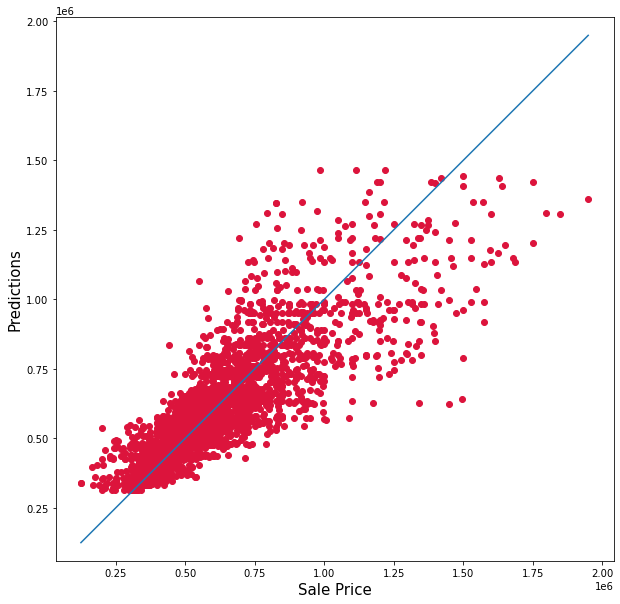

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [40]:
# Export our model as pickle file
pickle.dump(rf_model, open('rf_model.pkl','wb'))

In [42]:
model = pickle.load(open('rf_model.pkl','rb'))
print(model.predict([[8000, 140000]]))

[1461088.94446323]
